Momentum factor investing: K-ratio

In [1]:
import os

os.chdir('/home/hyunjun/workspace/backtester')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

In [3]:
universe = pd.read_csv('data/price.csv', index_col=0)

In [4]:
import statsmodels.api as sm

k_ratio_data = []
ret_1m = universe.pct_change().dropna()

for i in range(len(ret_1m)):
    ret_cum = np.log(1 + ret_1m[:i+1]).cumsum()
    x = np.array(range(len(ret_cum)))
    
    results = []
    
    for ticker in ret_1m.columns:
        
        try:
            y = ret_cum.loc[:,ticker]
            reg = sm.OLS(y, x).fit()
            res = float(reg.params / reg.bse)

        except:
            res = np.nan
        
        results.append(res)
    
    k_ratio_data.append(results)

k_ratio_data = pd.DataFrame(index=ret_1m.index, columns=ret_1m.columns, data=k_ratio_data)
k_ratio_data

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,U
1981-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-02-28,-1.681536,-1.143600,0.854030,-2.113962,16.158909,1.000000,2.829358,-3.212295,0.360508,-2.277345,...,-1.761456,-5.396784,-1.237599,2.192293,-1.272327,-0.539080,-0.064949,2.181570,-1.058022,-11.927435
1981-03-31,-4.341351,-3.067126,3.464703,-2.982331,0.303864,4.190101,-2.142649,-1.971712,-1.869356,-2.755147,...,-2.252713,-17.144812,-3.968628,3.888625,-1.484354,-1.585079,0.138459,6.124455,-1.900234,-1.534800
1981-04-30,-7.779606,-5.957172,1.966027,-5.432009,2.001422,7.274993,-3.278748,-4.537533,-4.398743,-3.287534,...,-3.319201,-10.018609,-3.678456,5.271397,-1.858373,-2.945111,0.761294,6.295556,-2.347423,-2.550737
1981-05-31,-9.203100,-5.149486,3.716504,-6.663540,3.997994,11.258830,-1.289486,-7.636977,-6.689791,-3.340037,...,-4.002167,-1.466537,-3.525513,4.546155,-1.783064,-1.616145,1.930122,8.989193,-2.325995,-2.983988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,-10.748746,-48.293153,157.769164,-15.106429,72.813373,26.779414,152.350502,-2.663071,-77.322826,6.433445,...,-13.858239,3.669626,3.674175,36.190614,47.181977,169.228819,105.237855,60.937764,56.734629,17.429569
2019-09-30,-10.488604,-48.519891,158.406234,-15.061131,73.040420,26.801296,151.840922,-2.588339,-77.046524,6.529769,...,-13.793359,3.554290,3.858972,36.183489,47.316481,169.941413,105.620046,61.158891,56.964897,17.492580
2019-10-31,-10.257872,-48.747727,159.080667,-15.021694,73.251662,26.824279,151.154265,-2.513763,-76.787977,6.604954,...,-13.739983,3.438051,4.041575,36.185352,47.450506,170.512130,106.022640,61.341029,57.190847,17.539859
2019-11-30,-10.028965,-48.976637,159.724687,-14.973816,73.519553,26.857050,150.737886,-2.426433,-76.511259,6.686156,...,-13.691387,3.332757,4.222076,36.197338,47.584051,170.976620,106.479852,61.552654,57.429101,17.581010


In [15]:
rank_data = k_ratio_data.rank(axis=1, method='first', ascending=False)
rank_data

,A,B,C,D,E,F,G,H,I,J,...,L,M,N,O,P,Q,R,S,T,U
1981-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-02-28,15.0,12.0,6.0,17.0,1.0,5.0,2.0,19.0,7.0,18.0,...,16.0,20.0,13.0,3.0,14.0,10.0,8.0,4.0,11.0,21.0
1981-03-31,20.0,18.0,4.0,17.0,5.0,2.0,14.0,13.0,11.0,16.0,...,15.0,21.0,19.0,3.0,8.0,10.0,6.0,1.0,12.0,9.0
1981-04-30,20.0,19.0,5.0,18.0,4.0,1.0,12.0,17.0,16.0,13.0,...,14.0,21.0,15.0,3.0,8.0,11.0,6.0,2.0,9.0,10.0
1981-05-31,21.0,17.0,5.0,18.0,4.0,1.0,8.0,20.0,19.0,14.0,...,16.0,9.0,15.0,3.0,11.0,10.0,6.0,2.0,12.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,17.0,20.0,2.0,19.0,5.0,11.0,3.0,16.0,21.0,13.0,...,18.0,15.0,14.0,10.0,9.0,1.0,4.0,6.0,7.0,12.0
2019-09-30,17.0,20.0,2.0,19.0,5.0,11.0,3.0,16.0,21.0,13.0,...,18.0,15.0,14.0,10.0,9.0,1.0,4.0,6.0,7.0,12.0
2019-10-31,17.0,20.0,2.0,19.0,5.0,11.0,3.0,16.0,21.0,13.0,...,18.0,15.0,14.0,10.0,9.0,1.0,4.0,6.0,7.0,12.0
2019-11-30,17.0,20.0,2.0,19.0,5.0,11.0,3.0,16.0,21.0,13.0,...,18.0,15.0,14.0,10.0,9.0,1.0,4.0,6.0,7.0,12.0


In [6]:
def get_action(index: int, top_n: int):
    tickers = universe.columns.to_numpy()
    action = tickers[rank_data.iloc[index].to_numpy() <= top_n]
    return action

In [11]:
def get_mdd(pvs):
    df = pd.DataFrame(pvs)
    premaxs = df.cummax()
    drawdowns = (1-df / premaxs) * 100
    mdd = drawdowns.max().iloc[0]
    return mdd

Back testing

In [7]:
from object import Portfolio
from object import Order

top_n = 5
profitloss = 0
balance = 0
init_balance = 1000
portfolio_value = init_balance

PVs = []
PFs = []
POs = []
TIs = []

for i in range(1, len(ret_1m)-1):

    p_old = Portfolio(get_action(i, top_n), np.ones(top_n) / top_n) if i == 1 else p_old
    price_old = universe.iloc[i][p_old.ticker].values if i == 1 else price_old

    POs.append(p_old.weight)
    TIs.append(p_old.ticker)
    
    # 여기는 get_price 함수로 (인자는 ticker 받도록)
    price_old = universe.iloc[i-1][p_old.ticker].values
    price_now = universe.iloc[i][p_old.ticker].values

    # 다음 타임 스텝에서 가격 변동으로 인한 포트폴리오 변화
    ratio = (price_now - price_old) / price_old
    ratio = np.where(np.isnan(ratio), np.float64(-0.99), ratio)
    weight_now = p_old.weight * (1+ratio) 
    weight_now = weight_now / np.sum(weight_now)

    p_old.update_weight(weight_now)
    
    # 다음 타입 스텝에서 가격 변동으로 인한 포트폴리오 평가금액, 수익률 계산
    portfolio_value = np.dot(portfolio_value * p_old.weight, 1+ratio)
    # profitloss = ((portfolio_value / init_balance) -1) * 100
    profitloss = np.log(portfolio_value / init_balance) * 100

    # Desired Portfolio
    p_new = Portfolio(get_action(i, top_n), np.ones(top_n) / top_n)

    """
    Order 계산
    """
    # Gap 계산 대상
    gap_ticker = p_old.ticker[np.isin(p_old.ticker, p_new.ticker)] 

    # Gap 사이즈
    gap_size = p_new.weight[np.isin(p_old.ticker, p_new.ticker)] - \
        p_old.weight[np.isin(p_old.ticker, p_new.ticker)]
    
    # 매도 대상
    sell_ticker = p_old.ticker[~ np.isin(p_old.ticker, p_new.ticker)]

    # 매도 대상 사이즈
    sell_size = -p_old.weight[~ np.isin(p_old.ticker, p_new.ticker)]

    # 매수 대상
    buy_ticker = p_new.ticker[~ np.isin(p_new.ticker, p_old.ticker)]

    # 매수 대상 사이즈
    buy_size = p_new.weight[~ np.isin(p_new.ticker, p_old.ticker)]

    # 오더
    order = Order()

    gap_order = (gap_ticker, gap_size)
    sell_order = (sell_ticker, sell_size)
    buy_order = (buy_ticker, buy_size)

    order.append(*gap_order)
    order.append(*sell_order)
    order.append(*buy_order)
        
    # 보유하고 있는 종목과 보유할 종목을 combine 해놓기
    combine = {}.fromkeys(order.ticker, 0.0)
    combine.update(p_old.dict)
    weight = np.fromiter(combine.values(), dtype=np.float64)
    
    closing_price_all = universe.iloc[i][order.ticker].values

    """
    거래 
    """
    CHARGE = 0.000 #0.001
    TEX = 0.0000 #0.0025
    FEE = 0.0

    sell_cost = CHARGE + TEX
    buy_cost = CHARGE

    action = order.size

    # 매도 주문부터
    sell_ind = np.where( (action < 0) )[0]
    weight[sell_ind] += action[sell_ind]
    sell_moneys = portfolio_value * abs(action[sell_ind]) * (1.0-sell_cost)
    sell_amount = np.sum(sell_moneys) 
    balance += sell_amount
    FEE += sell_amount * sell_cost

    # 매수 주문 처리
    buy_ind = np.where( (action > 0) )[0]
    buy_moneys = portfolio_value * action[buy_ind] * (1.0+buy_cost)
    buy_amount = np.sum(buy_moneys) 

    allocation = buy_moneys / buy_amount

    buy_fee = balance * (buy_cost/(1+buy_cost)) 
    feasible_buy_moneys = (balance - buy_fee) * allocation 
    feasible_buy_amount = np.sum(feasible_buy_moneys)
    feasible_buy_action = feasible_buy_moneys / portfolio_value
    FEE += feasible_buy_amount * buy_cost # (= buy_fee)

    weight[buy_ind] += feasible_buy_action
    weight = weight / np.sum(weight)

    portfolio_value -= FEE
    balance -= feasible_buy_amount 

    p_old = Portfolio(order.ticker[weight>0], weight[weight>0])

    PVs.append(portfolio_value)
    PFs.append(profitloss)

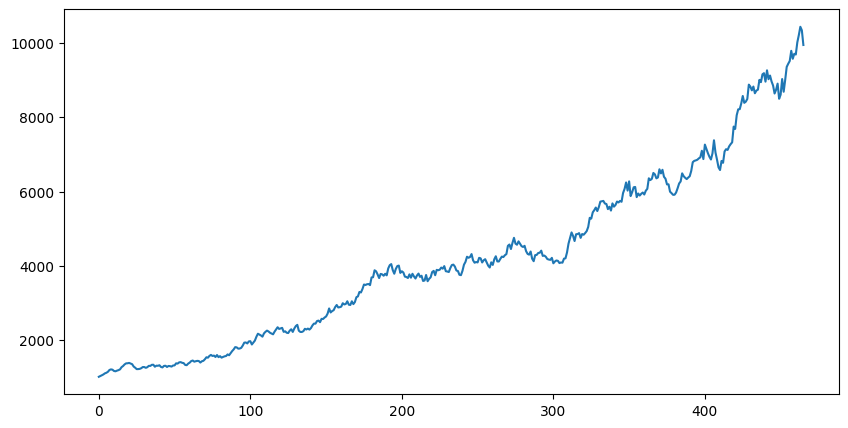

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(PVs)

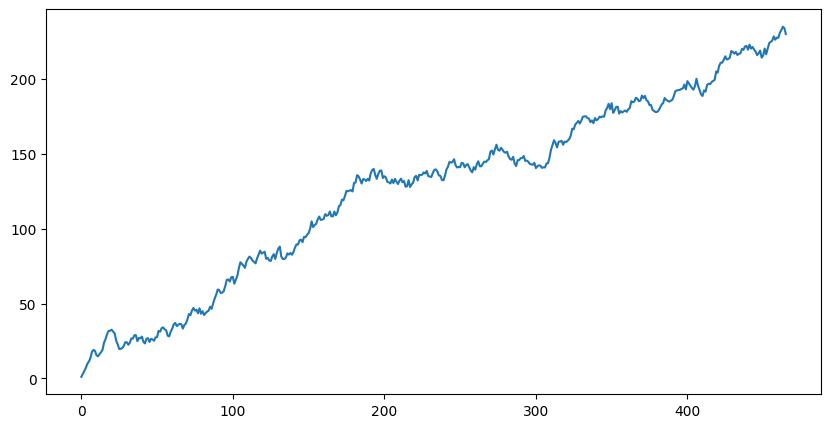

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(PFs)

In [12]:
print('MDD:', get_mdd(PVs))

MDD: 14.431358816551976


In [13]:
pd.DataFrame(TIs)

,0,1,2,3,4
0,E,F,G,O,S
1,E,F,G,O,S
2,E,F,O,S,C
3,E,F,O,S,C
4,E,F,O,S,C
...,...,...,...,...,...
461,G,E,Q,C,R
462,G,E,Q,C,R
463,G,E,Q,C,R
464,G,E,Q,C,R
